# Importing Libraries & Data Load

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib

In [3]:
# Define the path to the Excel file

file_path = r"C:\Users\Bhushan\Documents\Churn Analysis\Prediction_Data.xlsx"


In [4]:
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'


In [6]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


# Data Preprocessing

In [7]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


In [8]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

In [9]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])


In [10]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [11]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [12]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [13]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [14]:
# Train the model

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)


In [17]:
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))


Confusion Matrix:
[[790  51]
 [140 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       841
           1       0.81      0.61      0.70       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.83      1202



In [18]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]


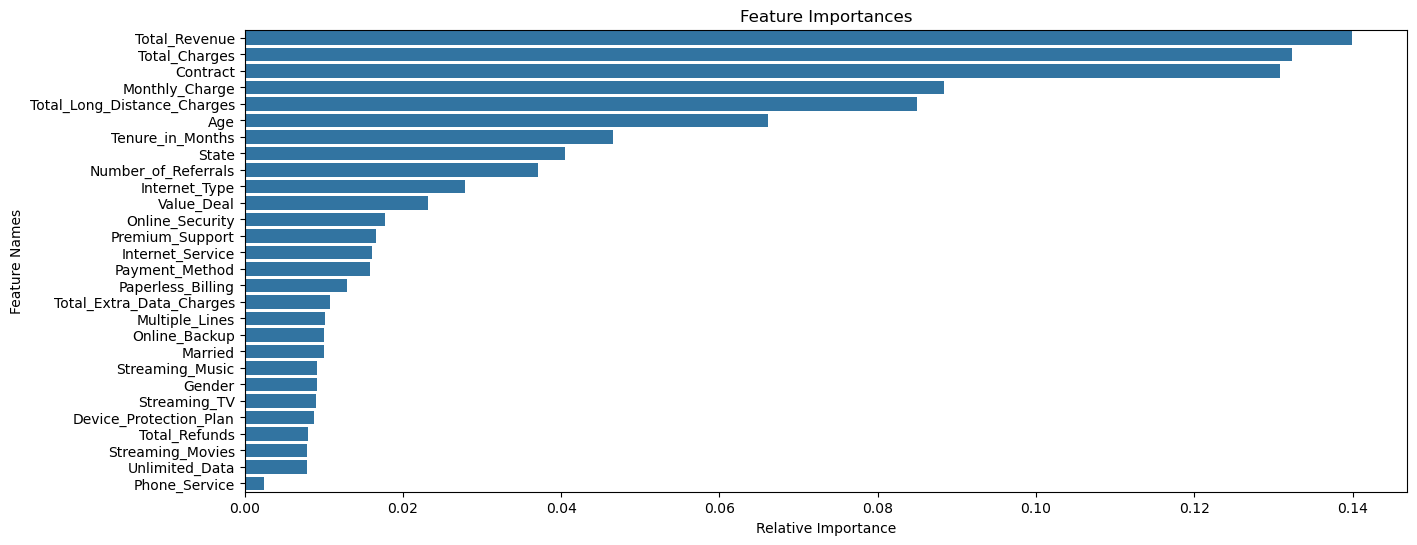

In [19]:
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

# Use Model for Prediction on New Data

In [20]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\Bhushan\Documents\Churn Analysis\Prediction_Data.xlsx"

In [21]:
# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

In [22]:
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)


In [23]:
# Display the first few rows of the fetched data

new_data.head()


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others
1,12469-AND,Male,24,Yes,Andhra Pradesh,11,4,NaN,Yes,No,...,Credit Card,55.299999,55.299999,0.0,0,36.689999,91.989998,Joined,Others,Others
2,26412-ASS,Female,30,No,Assam,7,18,NaN,Yes,No,...,Bank Withdrawal,20.700001,39.849998,0.0,0,27.780001,67.629997,Joined,Others,Others
3,26448-BIH,Female,57,No,Bihar,10,21,Deal 5,Yes,No,...,Bank Withdrawal,75.300003,244.100006,0.0,0,116.970001,361.070007,Joined,Others,Others
4,26902-TEL,Male,52,Yes,Telangana,7,2,NaN,Yes,No,...,Bank Withdrawal,95.849998,95.849998,0.0,0,2.700000,98.550003,Joined,Others,Others


In [24]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

In [25]:
# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']


In [26]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


In [27]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])


In [28]:

# Make predictions

new_predictions = rf_model.predict(new_data)


In [29]:
# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 


In [30]:
# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [32]:
# Save the results

original_data.to_csv(r"C:\Users\Bhushan\Documents\Churn Analysis\Predictions.csv", index=False)